# SIC for ndmg Pipeline

**ndmg** contains two types of analysis: subject level, and participant level.

### Run Subject Level Analysis

The first step of ndmg turns 'raw' Nifti images into connectomes. The cell below executes the first step of the pipeline on a demo subject. The subject has been heavily downsampled so running the cell below should take only 3-4 minutes.

N.B. the command below is more complicated in appearance than that documented elsewhere, which is because downsampling the data to produce a fast-running demo required new atlases and labels to be generated, which can normally be inferred by the pipeline.

In [33]:
%%bash

python /Users/gkiar/code/ocp/ndmg/ndmg/scripts/ndmg_pipeline.py \
       /Users/gkiar/code/ocp/ndmg/tests/data/KKI2009_113_1_DTI_s4.nii \
       /Users/gkiar/code/ocp/ndmg/tests/data/KKI2009_113_1_DTI_s4.bval \
       /Users/gkiar/code/ocp/ndmg/tests/data/KKI2009_113_1_DTI_s4.bvec \
       /Users/gkiar/code/ocp/ndmg/tests/data/KKI2009_113_1_MPRAGE_s4.nii \
       /Users/gkiar/code/ocp/ndmg/tests/data/MNI152_T1_1mm_s4.nii.gz \
       /Users/gkiar/code/ocp/ndmg/tests/data/MNI152_T1_1mm_brain_mask_s4.nii.gz \
       /Users/gkiar/code/ocp/ndmg/tests/data/outputs \
       /Users/gkiar/code/ocp/ndmg/tests/data/desikan_s4.nii.gz -c

Creating output directory: /Users/gkiar/code/ocp/ndmg/tests/data/outputs
Creating output temp directory: /Users/gkiar/code/ocp/ndmg/tests/data/outputs/tmp
This pipeline will produce the following derivatives...
DTI volume registered to atlas: /Users/gkiar/code/ocp/ndmg/tests/data/outputs/reg_dti/KKI2009_113_1_DTI_s4_aligned.nii.gz
Diffusion tensors in atlas space: /Users/gkiar/code/ocp/ndmg/tests/data/outputs/tensors/KKI2009_113_1_DTI_s4_tensors.npz
Fiber streamlines in atlas space: /Users/gkiar/code/ocp/ndmg/tests/data/outputs/fibers/KKI2009_113_1_DTI_s4_fibers.npz
Graphs of streamlines downsampled to given labels: /Users/gkiar/code/ocp/ndmg/tests/data/outputs/graphs/desikan_s4/KKI2009_113_1_DTI_s4_desikan_s4.gpickle
Generating gradient table...
B-values shape (17,)
         min 0.000000 
         max 700.000000 
B-vectors shape (17, 3)
         min -0.991788 
         max 1.000000 
None
Aligning volumes...
Executing: eddy_correct /Users/gkiar/code/ocp/ndmg/tests/data/outputs/tmp/KKI2

### View Subject Level Results

You can view your graph with the following Python code:

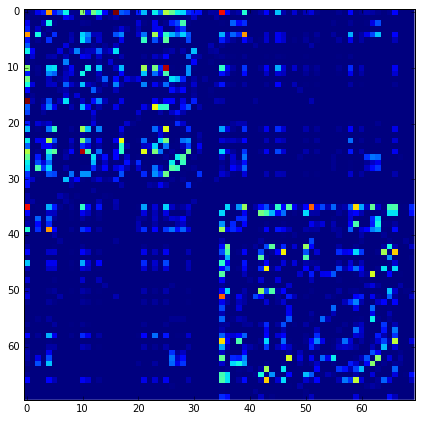

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
g = nx.read_gpickle('/Users/gkiar/code/ocp/ndmg/tests/data/outputs/graphs/desikan_s4/KKI2009_113_1_DTI_s4_desikan_s4.gpickle')
g = nx.adj_matrix(g).todense()
fig = plt.figure(figsize=(7,7))
p = plt.imshow(g, interpolation='None')

### Run Group Level Analysis
The second step of ndmg turns connectomes into quality plots of the data. The cell below executes the second step of the pipeline on the previously processed demo subject. This analysis should take a few seconds.

In [39]:
%%bash

ndmg_bids /Users/gkiar/code/ocp/ndmg/tests/data/outputs/graphs/ \
          /Users/gkiar/code/ocp/ndmg/tests/data/outputs/qc/ \
          group

Parcellation: desikan_s4
/Users/gkiar/code/ocp/ndmg/tests/data/outputs/qc/desikan_s4
Computing: NNZ
Computing: Degree Seuqence
Computing: Edge Weight Sequence
Computing: Clustering Coefficient Sequence
Computing: Scan Statistic-1 Sequence
Computing: Eigen Value Sequence
Computing: Betweenness Centrality Sequence


### View Group Level Results

The group level analysis (here only being performed on a single subject) produces a plot which tells you about your graphs. It also produces a `json` file which summarizes some information about the figure generated for future reference.

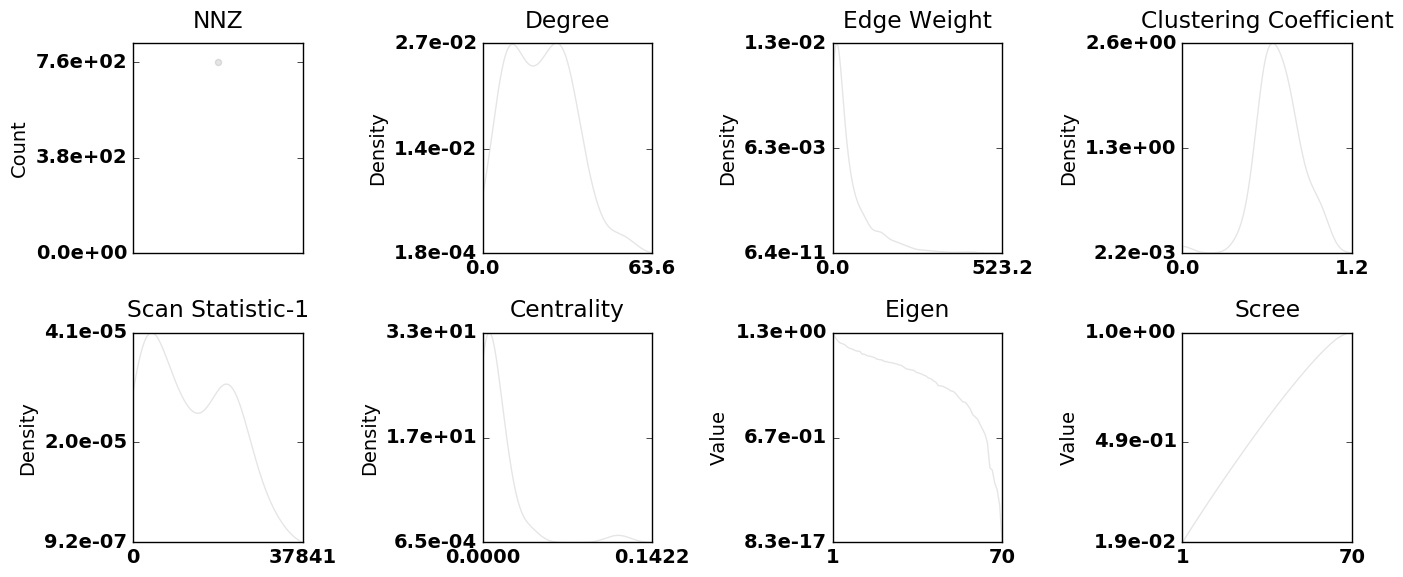

In [40]:
from IPython.display import Image
Image(filename='/Users/gkiar/code/ocp/ndmg/tests/data/outputs/qc/desikan_s4/desikan_s4_summary.png')